In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [32]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from word2number import w2n

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv')
df.head()


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


# missing data handle

In [34]:
df.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [35]:
df.experience = df.experience.fillna("zero")
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [36]:
df.experience = df.experience.apply(w2n.word_to_num)
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [37]:
import math
median_test_score = math.floor(df['test_score(out of 10)'].mean())
median_test_score

7

In [38]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_test_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [39]:
import matplotlib.pyplot as plt

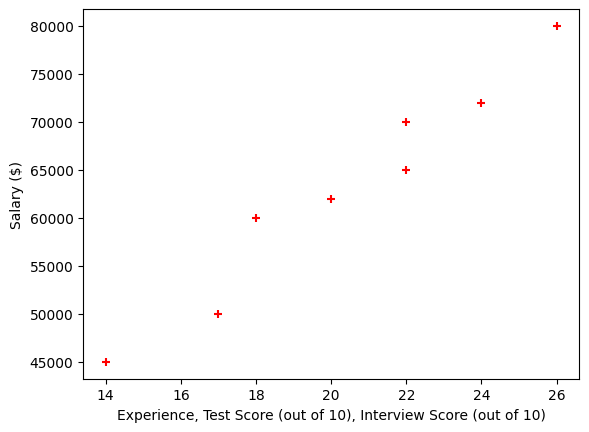

In [40]:
plt.xlabel('Experience, Test Score (out of 10), Interview Score (out of 10)')
plt.ylabel('Salary ($)')
plt.scatter(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']].sum(axis=1),df['salary($)'], color='red', marker='+')
plt.show()

In [41]:
LR = linear_model.LinearRegression()
LR.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [42]:
LR.predict([[2,9,6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [43]:
LR.predict([[12,10,10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])

In [44]:
df.corr()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
experience,1.000000,-0.352557,-0.290480,0.908017
test_score(out of 10),-0.352557,1.000000,0.186655,-0.077524
interview_score(out of 10),-0.290480,0.186655,1.000000,0.037820
salary($),0.908017,-0.077524,0.037820,1.000000
